##Creating & Exploring Mountain Car Environment

In [39]:
# Install the Box2D and Gym libraries
# Box2D is a physics engine used for simulating rigid body dynamics in 2D.
!pip install Box2D gym

In [40]:
#Installing Dependencies for Reinforcement Learning and Environment Rendering
!pip install swig
!pip install moviepy
!pip install imageio
!pip install Box2D gym
!pip install ffmpeg --upgrade
!pip install pyvirtualdisplay
!pip install gymnasium[classic-control]
!pip install gym[classic_control]

  Using cached pygame-2.1.0.tar.gz (5.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [41]:
#Importing Essential Libraries
%matplotlib inline
import warnings
warnings.simplefilter(action = 'ignore')
import os
import gym
import random
import imageio
import subprocess
import numpy as np
from glob import glob
from IPython import display
import IPython.display as ipd
from matplotlib import pyplot as plt
from IPython.display import clear_output

Goal: Reach the flag at the top of the hill by achieving a position of 0.5 or higher on the x-axis.

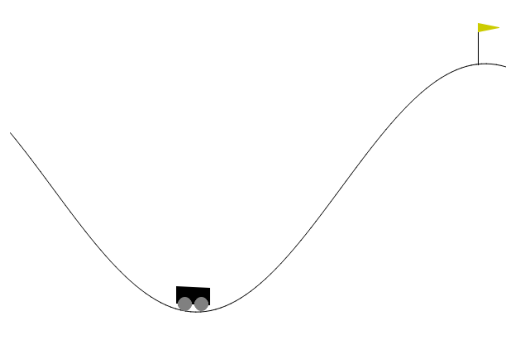

In [42]:
#Displaying the MountainCar-v0
def display(env: gym.Env) -> None:
    env.reset()
    img = plt.imshow(env.render()[0])
    plt.axis('off')
    plt.show()
env = gym.make('MountainCar-v0', render_mode="rgb_array")
display(env)
env.close()

In [43]:
#Exploring the MountainCar-v0 Environment Properties in OpenAI Gym
env_name = 'MountainCar-v0'
env = gym.make(env_name)
print("Environment:", env_name)
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)
print("Reward Range:", env.reward_range)
print("Number of Actions:", env.action_space.n)
if hasattr(env, 'get_action_meanings'):
    print("Action Meanings:", env.get_action_meanings())
if hasattr(env, 'get_keys_to_action'):
    print("Keys to Action:", env.get_keys_to_action())
env.close()

Environment: MountainCar-v0
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Discrete(3)
Reward Range: (-inf, inf)
Number of Actions: 3
Keys to Action: {(): 1, (276,): 0, (275,): 2, (275, 276): 1}


In [44]:
print(env.observation_space.low) # minimum possible values for each variable in the state space
print(env.observation_space.high) # maximum possible values for each variable in the state space

[-1.2  -0.07]
[0.6  0.07]


In [45]:
#Initializing and Resetting the MountainCar-v0 Environment
env = gym.make('MountainCar-v0')
initial_state = env.reset()
print("Initial State:", initial_state)

Initial State: [-0.59575933  0.        ]


In [46]:
#Running a Random Agent in the MountainCar-v0
warnings.simplefilter(action = 'ignore')
def run(env, num_episodes=50):
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        while True:
            action = env.action_space.sample()
            state, reward, done, _ = env.step(action)[:4]
            total_reward += reward
            if done:
                break
        rewards.append(total_reward)
    return rewards

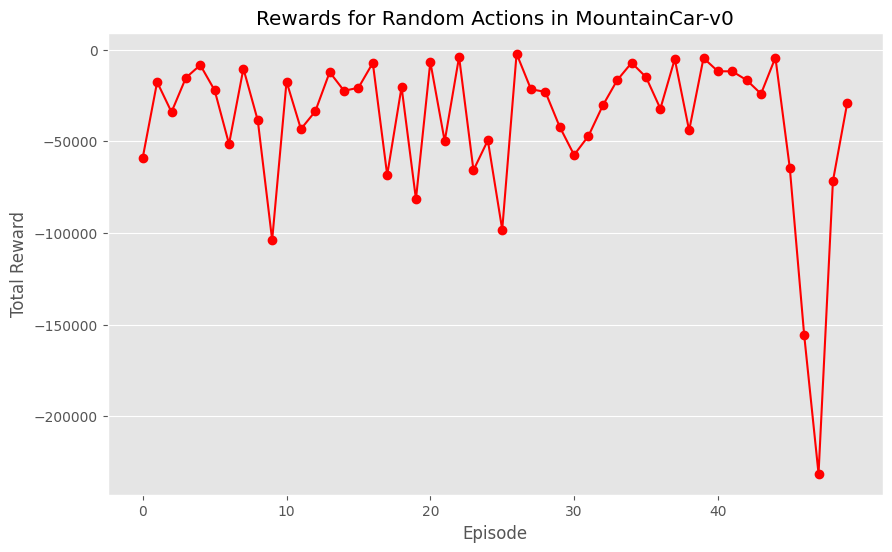

In [49]:
#Visualizing Episode Rewards for a Random Agent in MountainCar-v0
import gymnasium as gym # Use gymnasium instead of gym
env = gym.make('MountainCar-v0')

# The run function is defined in a previous cell (a24f-gtAorBW),
# which has already been modified to use gymnasium.
episode_rewards = run(env, num_episodes=50) # run the random agent for 50 episodes

plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, color='r', marker='o')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards for Random Actions in MountainCar-v0')
plt.xticks(np.arange(0, 49, 10))
plt.grid(axis='x')
plt.show()
env.close()

In [50]:
#Capturing and Saving Random Agent Frames from MountainCar-v0 as a Video
env = gym.make('MountainCar-v0', render_mode="rgb_array")
state = env.reset()
output_directory = "/kaggle/working/framesrandom/"
os.makedirs(output_directory, exist_ok=True)
frames = [] # store frames
for i in range(100): # take 100 random actions
    frame = env.render()
    frames.append(frame)
    action = env.action_space.sample() #take a random action
    state, reward, done, _ = env.step(action)[:4]
for i, frame in enumerate(frames):
    image_path = os.path.join(output_directory, f"frame_{i:03d}.png")
    imageio.imwrite(image_path, (frame * 255).astype(np.uint8))
# create a video from saved frames
os.system(f"ffmpeg -framerate 2 -i {output_directory}/frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p videomelhes.mp4 2>NUL")

256

In [51]:
#Converting a Recorded Agent Run into a Video Using FFmpeg
plt.style.use('ggplot')
input_file = '/kaggle/input/agentrandom'
subprocess.run(['ffmpeg','-i',input_file,'-qscale',
                '0','videomelhes.mp4','-loglevel','quiet']
              )
!ls -GFlash --color
ipd.Video('videomelhes.mp4',embed=True, width=400)

total 172K
4.0K drwxr-xr-x 1 root 4.0K Oct 30 05:46 ./
4.0K drwxr-xr-x 1 root 4.0K Oct 30 05:32 ../
 44K -rw-r--r-- 1 root  42K Oct 30 05:46 cassietvid.mp4
4.0K drwxr-xr-x 4 root 4.0K Oct 28 13:34 .config/
4.0K drwxr-xr-x 2 root 4.0K Oct 30 05:46 frames/
4.0K -rw-r--r-- 1 root 2.0K Oct 30 06:05 NUL
 12K -rw-r--r-- 1 root 9.5K Oct 30 05:58 q_table.npy
4.0K drwxr-xr-x 1 root 4.0K Oct 28 13:34 sample_data/
 92K -rw-r--r-- 1 root  92K Oct 30 05:43 videomelhes.mp4


##Training With Q-Learning Algorithm

In [52]:
#Implementing Q-Learning with State Discretization
def discretize_state(state, bins):
    """Discretize the continuous state into discrete bins."""
    if isinstance(state, tuple):
        state = state[0]
    discretized_state = tuple(np.digitize(s, bins[i]) - 1 for i, s in enumerate(state))
    return discretized_state
def q_learning(env, num_episodes=500, alpha=0.07, gamma=0.99, epsilon=0.3):
    num_bins = [20, 20] # discretize the state space
    state_bins = [np.linspace(-1.2, 0.6, num_bins[0]),
                  np.linspace(-0.07, 0.07, num_bins[1])]
    num_actions = env.action_space.n # initialize q-table
    Q = np.zeros((num_bins[0], num_bins[1], num_actions))
    rewards = [] # store rewards and number of actions taken
    num_actions_list = []
    for episode in range(num_episodes):
        state = discretize_state(env.reset(), state_bins)
        total_reward = 0
        num_actions_episode = 0

        while True:
            # epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # explore
            else:
                action = np.argmax(Q[state])  # exploit
            next_state, reward, done, _ = env.step(action)[:4]
            next_state = discretize_state(next_state, state_bins)
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action]) # q-value update ny the q-learning formula
            state = next_state
            total_reward += reward
            num_actions_episode += 1
            if done:
                break
        rewards.append(total_reward)
        num_actions_list.append(num_actions_episode)
    np.save('q_table.npy', Q)
    return rewards, num_actions_list

env = gym.make('MountainCar-v0', render_mode="rgb_array")
initial_state = env.reset()
rewards, num_actions_list = q_learning(env, num_episodes=500) # run q-learning


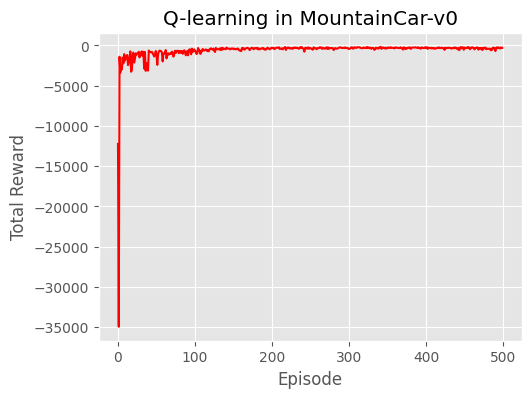

In [53]:
#Visualizing Q-Learning Performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rewards,color='r', label='Episode Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-learning in MountainCar-v0')
plt.grid(True)

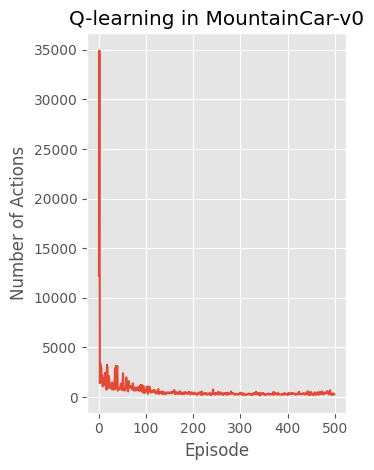

In [54]:
plt.subplot(1, 2, 2)
plt.plot(num_actions_list, label='Number of Actions') # number of actions taken
plt.xlabel('Episode')
plt.ylabel('Number of Actions')
plt.title('Q-learning in MountainCar-v0')
plt.grid(True)
plt.tight_layout()
plt.show()

env.close()

In [55]:
#Loading and Inspecting the Trained Q-Table for MountainCar-v0
Q_table = np.load('q_table.npy')
print(f"Q-table size: {Q_table.shape}")
print("Q-table after training:")
print(Q_table)

Q-table size: (20, 20, 3)
Q-table after training:
[[[  0.           0.           0.        ]
  [ -0.29083172  -0.83917851   0.        ]
  [-15.91587576 -15.96836163 -15.61452116]
  ...
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 [[  0.           0.           0.        ]
  [ -2.94279577  -2.20526965  -2.60941697]
  [-17.80879528 -18.29393269 -18.2176329 ]
  ...
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 [[  0.           0.           0.        ]
  [ -7.87493175  -7.7887721   -8.15848606]
  [-19.95352145 -19.42012678 -19.8476113 ]
  ...
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 ...

 [[  0.           0.           0.        ]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]
  ...
  [  0.    

In [56]:
#Playing and Visualizing a Trained Q-Learning Agent
warnings.simplefilter(action = 'ignore')
def play_game_with_frames(env, Q_table, max_steps=1000):
    output_directory = "frames"
    os.makedirs(output_directory, exist_ok=True)
    state = env.reset()
    state = discretize_state(state, state_bins)
    print(f"Initial state: {state}")
    episode_frames = []
    total_reward = 0
    for step in range(max_steps):
        frame = env.render()
        if frame is not None:
            episode_frames.append(frame)
        action = np.argmax(Q_table[state])  # select action using q-table
        next_state, reward, done, _ = env.step(action)[:4]
        state = discretize_state(next_state, state_bins)
        total_reward += reward
        if done:
            break
    print(f"Total Reward: {total_reward}")
    for i, frame in enumerate(episode_frames): # save frames for this episode
        image_path = os.path.join(output_directory, f"frame_{i:03d}.png")
        imageio.imwrite(image_path, (frame * 255).astype(np.uint8))
    env.close()

state_bins = [np.linspace(-1.2, 0.6, 20), np.linspace(-0.07, 0.07, 20)] # assuming we have the state_bin from training

initial_state = env.reset()
print(f"Initial state before the loop: {initial_state}")
initial_state = discretize_state(initial_state, state_bins)

# playing the game with the trained q-table for 1 episode, save frames, and print total reward
play_game_with_frames(env, Q_table)
# useing ffmpeg to create a video from saved frames
video_filename = "cassietvid.mp4"
os.system(f"ffmpeg -framerate 30 -pattern_type glob -i 'frames/*.png' -c:v libx264 -pix_fmt yuv420p {video_filename}")

Initial state before the loop: (array([-0.53259546,  0.        ], dtype=float32), {})
Initial state: (np.int64(6), np.int64(9))
Total Reward: -210.0


256

In [57]:
#Converting a Trained Agent’s Gameplay Video Using FFmpeg
plt.style.use('ggplot')
input_file = '/kaggle/input/trainedagent1'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                'cassietvid.mp4',
                '-loglevel',
                'quiet'])

CompletedProcess(args=['ffmpeg', '-i', '/kaggle/input/trainedagent1', '-qscale', '0', 'cassietvid.mp4', '-loglevel', 'quiet'], returncode=1)

In [58]:
#Displaying the Trained Agent’s Gameplay Video
!ls -GFlash --color
ipd.Video('cassietvid.mp4',embed=True, width=500)

total 180K
4.0K drwxr-xr-x 1 root 4.0K Oct 30 05:46 ./
4.0K drwxr-xr-x 1 root 4.0K Oct 30 05:32 ../
 44K -rw-r--r-- 1 root  42K Oct 30 05:46 cassietvid.mp4
4.0K drwxr-xr-x 4 root 4.0K Oct 28 13:34 .config/
 12K drwxr-xr-x 2 root  12K Oct 30 06:05 frames/
4.0K -rw-r--r-- 1 root 2.0K Oct 30 06:05 NUL
 12K -rw-r--r-- 1 root 9.5K Oct 30 06:05 q_table.npy
4.0K drwxr-xr-x 1 root 4.0K Oct 28 13:34 sample_data/
 92K -rw-r--r-- 1 root  92K Oct 30 05:43 videomelhes.mp4
